# Python Lab HW 5-6 [50 points]

### Hints for Problem 1-3:

Problem 1, 2 and 3 should be very straightforward exercises. They can be solved by modifying the codes that were provided to you during lab 5. For problem 2, use the exact same codes that were used to create 3 datasets (male adult, female adult and children), but you have to further separate the children data according to their gender.

For histograms, please be careful about the bins. The directions were provided to you during lab 5.

### Hints for Problem 4:

Problem 4 is actually a difficult problem. The problem is worth only 3 points, but it will take more than all the time you spent solving problem 1-3. The number of points in this problem is purposely set to be low, so please feel free to skip this problem if you do not have time.

This problem asks you to create a visual from the latest COVID-19 data. The data comes from the Centers for Disease Control and Prevention, which is a United States federal agency, under the Department of Health and Human Services. It has one of the largest datasets for COVID-19, and the NHANES dataset that we frequently use in the lab is also coming from this agency.

The dataset is named as "Excess_Deaths_Associated_with_COVID-19.csv", and it is located in "Dataset used in labs" folder under "labs" folder. Before you start working on the coding, it might be useful for you to insepct this dataset in Excel, or go to the website where the data is taken from, to understand the structure of the dataset.

Since we are finished with the introduction to Python, numpy, pandas and matplotlib, I set this problem as a final review exercise. You should be very proud of yourself if you were able to solve this problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem1 [17 points]:

Create a histogram that shows the income distribution of San Francisco city. The data is taken from 

https://www.kaggle.com/kaggle/sf-salaries

and you can load it by using

```Python
pd.read_csv('Data/Salaries.csv')
```

The salary data is located in `'TotalPay'` column.

Create a histogram that shows the distribution of the data. You must include the following:

- Create a histogram [7 points]
- Correct bins [3 points] (You can use the default histogram without any bins, but please make your histogram look nicer)
- Create a horizontal line that shows the median [2 points]
- Create a horizontal line that shows the mean [2 points]
- Appropriate labels [2 points]
- Comment on the distribution (positively/negatively skewed, symmetric) [1 point]

In [3]:
df = pd.read_csv('Data/Salaries.csv')
salary = df['TotalPay'].dropna()

C:\Users\daiki\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
print('Max:', np.max(salary))
print('Min:', np.min(salary))

Max: 567595.43
Min: 0.0


Create histogram with bin width 10000

$$
(570000 - 0)/10000 = 57
$$
We must create (57+1)= 58points

In [9]:
np.linspace(0, 570000, 58)

array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
        70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
       140000., 150000., 160000., 170000., 180000., 190000., 200000.,
       210000., 220000., 230000., 240000., 250000., 260000., 270000.,
       280000., 290000., 300000., 310000., 320000., 330000., 340000.,
       350000., 360000., 370000., 380000., 390000., 400000., 410000.,
       420000., 430000., 440000., 450000., 460000., 470000., 480000.,
       490000., 500000., 510000., 520000., 530000., 540000., 550000.,
       560000., 570000.])

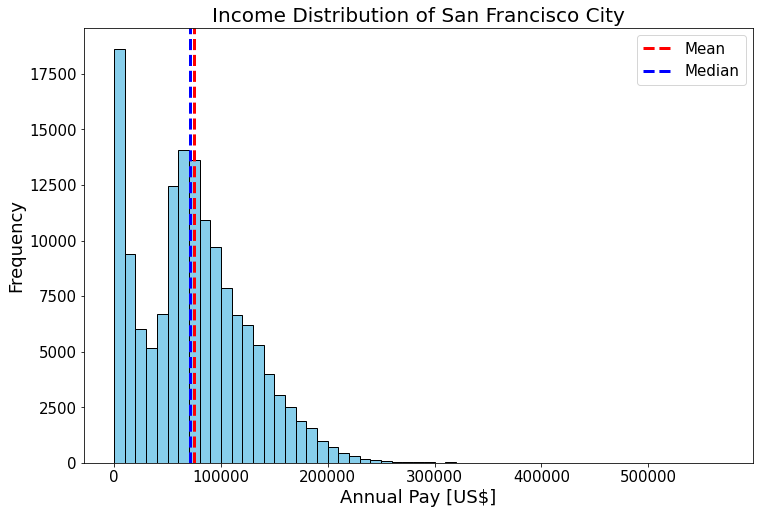

In [15]:
x_value = salary

fig, axs = plt.subplots(figsize=(12,8))
axs.hist(x_value, color="SkyBlue", edgecolor="Black", bins=np.linspace(0, 570000, 58))
plt.title("Income Distribution of San Francisco City", fontsize=20)
axs.set_xlabel("Annual Pay [US$]", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)

axs.axvline(np.mean(salary), color='red', ls='dashed', lw=3, label='Mean')
axs.axvline(np.median(salary), color='blue', ls='dashed', lw=3, label='Median')
axs.legend(prop={'size': 15})

axs.tick_params(labelsize=15)
plt.show()

This looks like a positively skewed distribution.

# Problem 2 [20 points]

Create a grouped histogram that shows the weight data from the NHANES dataset. You can load the NHANES dataset by using:

```Python
pd.read_csv('Data/NHANES.csv')
```
and the weight is located in `Weight` column.

The groups should be:

- Male adult (Gender:Male, Age>20)
- Female adult (Gender:Female, Age>=20)
- Young male (Gender:Male, Age<20)
- Young female (Gender:Female, Age<20)

Instead of writing the code from scratch, use the code that was introduced during the labs to create a grouped histogram of the height data. You only have to modify the code slightly for weight data.

Grading scheme:
- Get appropriate dataset [3 points]
- Get appropriate bins [4 points]
- Create a grouped histogram [8 points]
- Appropriate colors (able to see the overlaps) [2 points]
- Appropriate labels [3 points]

In [37]:
df = pd.read_csv('Data/NHANES.csv')

df = df.dropna(subset=['Weight'])

adult = df['Age'] >= 20
child = df['Age'] < 20

# Remember that == means a condition statement to find if two elements are the same
male = df['Gender'] == 'male'
female = df['Gender'] == 'female'

male_df = df[adult & male]
female_df = df[adult & female]
boy_df = df[child & male]
girl_df = df[child & female]

In [38]:
print('Max:', np.max(df['Weight']))
print('Min:', np.min(df['Weight']))

Max: 230.7
Min: 2.8


Choose width to be 5

$$
(235 - 0)/5 = 47
$$

We need (47+1)=48 points.

In [39]:
np.linspace(0,235,48)

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
       220., 225., 230., 235.])

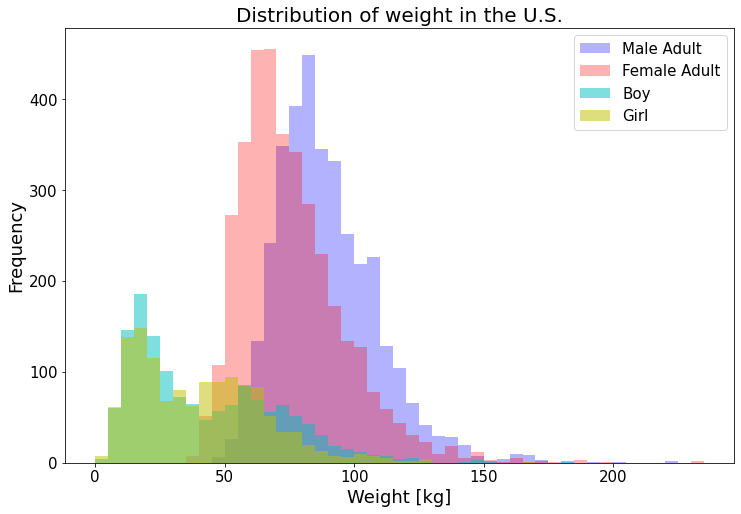

In [40]:
fig, axs = plt.subplots(figsize=(12,8))
axs.hist(male_df['Weight'], color="b", alpha=0.3, bins=np.linspace(0,235,48), label="Male Adult")
axs.hist(female_df['Weight'], color="r", alpha=0.3, bins=np.linspace(0,235,48), label="Female Adult")
axs.hist(boy_df['Weight'], color="c", alpha=0.5, bins=np.linspace(0,235,48), label="Boy")
axs.hist(girl_df['Weight'], color="y", alpha=0.5, bins=np.linspace(0,235,48), label="Girl")

plt.title("Distribution of weight in the U.S.", fontsize=20)
axs.set_xlabel("Weight [kg]", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})

plt.show()

# Problem 3 [10 points]

Use the same data in problem 2, but create a grouped boxplot instead.

Grading scheme:

- Use the same data that was used in problem 2 [1 point]
- Create a grouped boxplot [6 points]
- Appropriate labels [2 points]
- Briefly comment on the results [1 point]

C:\Users\daiki\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


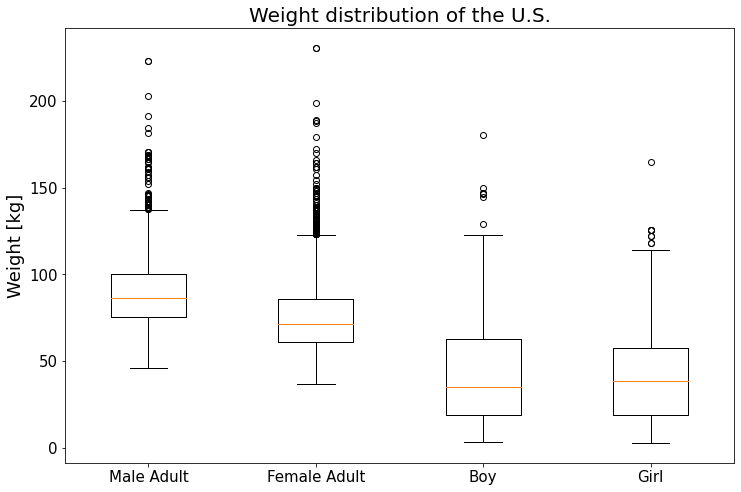

In [43]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([male_df['Weight'], female_df['Weight'], boy_df['Weight'], girl_df['Weight']])
plt.title('Weight distribution of the U.S.', fontsize=20)
axs.set_xticklabels(['Male Adult','Female Adult','Boy', 'Girl'])
axs.set_ylabel('Weight [kg]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

Sample comment from students:

- This boxplot shoes that on average, males weigh the most and young females weight the least, but it
does look like there are a few outliers. It is also
interesting to note that most of the outliers are
higher than the mean as opposed to lower than the mean. 

- This graph shows the average distributions of weight among each group of people. It shows that adult females have a lower average weight compared to males, and young females have a slightly lower average weight compared to young males. This makes sense considering that men generally have a higher body weight compared with women. It also shows that there is a larger distribution in adults compared to children, possibly indicating that more adults are outside of the normal distribution; however, it could also indicate that more adults than children have data in the dataset.

- The result shows that Male adults have the highest mean and always the highest IQR. While the female adult has a greater mean, but the top of IQR of the young male is more than female adult. Also, the young male has a lower mean than young female. All of them have a numerous oultiers showing that the data is not normally distributed which we can later confirm with the histograms.

# Problem 4 [3 points]

It has been reported that COVID-19 is the third leading cause of death in the U.S.

Article: https://www.scientificamerican.com/article/covid-19-is-now-the-third-leading-cause-of-death-in-the-u-s1/

While you do not have to read this article, notice that the "source" under the figures say "Centers for Disease Control and Prevention, National Center for Health Statistics". We are planning to use the raw dataset to analyze the latest COVID-19 deaths.

The dataset comes from https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm, and it was downloaded from the "National and State Estimates of Excess Deaths" link.

It can be loaded to Python by using:

```Python
pd.read_csv('Data/weekly_deaths.csv')
```

This dataset includes the weekly deaths from 2017. You should only take the dataset from Feb2020-Sep2020 and sum those weekly deaths to create montly deaths. Also, we would like to get a national death count. The deaths have two categories, so you should think about how we can get COVID-19 related deaths.

Obtaining the dataset is the most difficult part. However, you should create appropriate labels to the bar chart by changing the `plt.text()` argument in bar chart code that was provided to you during lab 3. You also have to determine the colors that were used, but I only used the colors that are specified in this document:

https://matplotlib.org/3.3.1/gallery/color/named_colors.html

The final output should look like:

<img src='Images/plot_covid.png' width=700>

Good luck.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df = pd.read_csv('Data/weekly_deaths.csv')

In [32]:
df.head()

,Week Ending Date,State,Observed Number,Upper Bound Threshold,Exceeds Threshold,Average Expected Count,Excess Lower Estimate,Excess Higher Estimate,Year,Total Excess Lower Estimate in 2020,Total Excess Higher Estimate in 2020,Percent Excess Lower Estimate,Percent Excess Higher Estimate,Type,Outcome,Suppress,Note
0,1/14/2017,Alabama,1130.0,1199.0,False,1042.0,0.0,88.0,2017,3533,5472,0.0,0.1,Predicted (weighted),All causes,NaN,NaN
1,1/21/2017,Alabama,1048.0,1214.0,False,1057.0,0.0,0.0,2017,3533,5472,0.0,0.0,Predicted (weighted),All causes,NaN,NaN
2,1/28/2017,Alabama,1026.0,1233.0,False,1076.0,0.0,0.0,2017,3533,5472,0.0,0.0,Predicted (weighted),All causes,NaN,NaN
3,2/4/2017,Alabama,1036.0,1231.0,False,1074.0,0.0,0.0,2017,3533,5472,0.0,0.0,Predicted (weighted),All causes,NaN,NaN
4,2/11/2017,Alabama,1058.0,1224.0,False,1071.0,0.0,0.0,2017,3533,5472,0.0,0.0,Predicted (weighted),All causes,NaN,NaN


In [33]:
df['Year'].value_counts()

2019    8424
2018    8424
2017    8262
2020    6480
Name: Year, dtype: int64

In [34]:
df = df[df['Year']==2020]

In [35]:
df['Type'].value_counts()

Predicted (weighted)    4320
Unweighted              2160
Name: Type, dtype: int64

In [36]:
df = df[df['Type']=='Predicted (weighted)']

In [37]:
df['Week Ending Date'].value_counts()

2/29/2020    108
2/22/2020    108
3/14/2020    108
2/1/2020     108
2/8/2020     108
8/8/2020     108
3/21/2020    108
5/30/2020    108
9/5/2020     108
3/28/2020    108
7/11/2020    108
8/1/2020     108
10/3/2020    108
9/26/2020    108
6/27/2020    108
5/23/2020    108
8/22/2020    108
4/18/2020    108
4/11/2020    108
6/20/2020    108
7/4/2020     108
6/6/2020     108
8/29/2020    108
2/15/2020    108
8/15/2020    108
9/19/2020    108
1/4/2020     108
3/7/2020     108
5/2/2020     108
5/9/2020     108
1/11/2020    108
4/25/2020    108
6/13/2020    108
4/4/2020     108
5/16/2020    108
1/18/2020    108
7/18/2020    108
9/12/2020    108
1/25/2020    108
7/25/2020    108
Name: Week Ending Date, dtype: int64

In [38]:
def function(row):
    if row['Week Ending Date'][0] == '2':
        return 'Feb'
    if row['Week Ending Date'][0] == '3':
        return 'March'
    if row['Week Ending Date'][0] == '4':
        return 'April'
    elif row['Week Ending Date'][0] == '5':
        return 'May'
    elif row['Week Ending Date'][0] == '6':
        return 'June'
    elif row['Week Ending Date'][0] == '7':
        return 'July'
    elif row['Week Ending Date'][0] == '8':
        return 'August'
    elif row['Week Ending Date'][0] == '9':
        return 'September'
    else:
        return 'NaN'

In [39]:
df['Month'] = df.apply(function, axis=1)

In [40]:
df['Month'].value_counts()

NaN          540
Feb          540
August       540
May          540
July         432
June         432
April        432
March        432
September    432
Name: Month, dtype: int64

In [41]:
df['Outcome'].value_counts()

All causes, excluding COVID-19    2160
All causes                        2160
Name: Outcome, dtype: int64

In [42]:
df['State'].value_counts()

New Hampshire           80
Nebraska                80
Oregon                  80
Minnesota               80
Virginia                80
Oklahoma                80
Connecticut             80
Indiana                 80
Washington              80
Michigan                80
Maryland                80
Vermont                 80
Pennsylvania            80
Missouri                80
Mississippi             80
California              80
Wisconsin               80
Kentucky                80
Colorado                80
Ohio                    80
Massachusetts           80
South Dakota            80
Utah                    80
New Mexico              80
Puerto Rico             80
Iowa                    80
Arkansas                80
Alaska                  80
New Jersey              80
North Dakota            80
Idaho                   80
North Carolina          80
South Carolina          80
Delaware                80
Wyoming                 80
Florida                 80
New York City           80
H

In [43]:
df = df[df['State']=='United States']

In [44]:
df.head()

,Week Ending Date,State,Observed Number,Upper Bound Threshold,Exceeds Threshold,Average Expected Count,Excess Lower Estimate,Excess Higher Estimate,Year,Total Excess Lower Estimate in 2020,Total Excess Higher Estimate in 2020,Percent Excess Lower Estimate,Percent Excess Higher Estimate,Type,Outcome,Suppress,Note,Month
9125,1/4/2020,United States,60145.0,61902.0,False,59478.0,0.0,667.0,2020,224173,299028,0.0,0.0,Predicted (weighted),All causes,NaN,NaN,NaN
9126,1/11/2020,United States,60707.0,62499.0,False,59995.0,0.0,712.0,2020,224173,299028,0.0,0.0,Predicted (weighted),All causes,NaN,NaN,NaN
9127,1/18/2020,United States,59339.0,62546.0,False,60233.0,0.0,0.0,2020,224173,299028,0.0,0.0,Predicted (weighted),All causes,NaN,NaN,NaN
9128,1/25/2020,United States,59126.0,62611.0,False,60349.0,0.0,0.0,2020,224173,299028,0.0,0.0,Predicted (weighted),All causes,NaN,NaN,NaN
9129,2/1/2020,United States,58780.0,62074.0,False,59906.0,0.0,0.0,2020,224173,299028,0.0,0.0,Predicted (weighted),All causes,NaN,Data in recent weeks are incomplete. Only 60% ...,Feb


In [45]:
all_case = df['Outcome'] == 'All causes'
no_covid = df['Outcome'] == 'All causes, excluding COVID-19'

all_df = df[all_case]
nocovid_df = df[no_covid]

In [46]:
all_df.head()

,Week Ending Date,State,Observed Number,Upper Bound Threshold,Exceeds Threshold,Average Expected Count,Excess Lower Estimate,Excess Higher Estimate,Year,Total Excess Lower Estimate in 2020,Total Excess Higher Estimate in 2020,Percent Excess Lower Estimate,Percent Excess Higher Estimate,Type,Outcome,Suppress,Note,Month
9125,1/4/2020,United States,60145.0,61902.0,False,59478.0,0.0,667.0,2020,224173,299028,0.0,0.0,Predicted (weighted),All causes,NaN,NaN,NaN
9126,1/11/2020,United States,60707.0,62499.0,False,59995.0,0.0,712.0,2020,224173,299028,0.0,0.0,Predicted (weighted),All causes,NaN,NaN,NaN
9127,1/18/2020,United States,59339.0,62546.0,False,60233.0,0.0,0.0,2020,224173,299028,0.0,0.0,Predicted (weighted),All causes,NaN,NaN,NaN
9128,1/25/2020,United States,59126.0,62611.0,False,60349.0,0.0,0.0,2020,224173,299028,0.0,0.0,Predicted (weighted),All causes,NaN,NaN,NaN
9129,2/1/2020,United States,58780.0,62074.0,False,59906.0,0.0,0.0,2020,224173,299028,0.0,0.0,Predicted (weighted),All causes,NaN,Data in recent weeks are incomplete. Only 60% ...,Feb


In [47]:
nocovid_df.head()

,Week Ending Date,State,Observed Number,Upper Bound Threshold,Exceeds Threshold,Average Expected Count,Excess Lower Estimate,Excess Higher Estimate,Year,Total Excess Lower Estimate in 2020,Total Excess Higher Estimate in 2020,Percent Excess Lower Estimate,Percent Excess Higher Estimate,Type,Outcome,Suppress,Note,Month
19655,1/4/2020,United States,60144.0,61902.0,False,59478.0,0.0,666.0,2020,32478,100947,0.0,0.0,Predicted (weighted),"All causes, excluding COVID-19",NaN,NaN,NaN
19656,1/11/2020,United States,60707.0,62499.0,False,59995.0,0.0,712.0,2020,32478,100947,0.0,0.0,Predicted (weighted),"All causes, excluding COVID-19",NaN,NaN,NaN
19657,1/18/2020,United States,59335.0,62546.0,False,60233.0,0.0,0.0,2020,32478,100947,0.0,0.0,Predicted (weighted),"All causes, excluding COVID-19",NaN,NaN,NaN
19658,1/25/2020,United States,59125.0,62611.0,False,60349.0,0.0,0.0,2020,32478,100947,0.0,0.0,Predicted (weighted),"All causes, excluding COVID-19",NaN,NaN,NaN
19659,2/1/2020,United States,58780.0,62074.0,False,59906.0,0.0,0.0,2020,32478,100947,0.0,0.0,Predicted (weighted),"All causes, excluding COVID-19",NaN,Data in recent weeks are incomplete. Only 60% ...,Feb


In [48]:
month = ['Feb','March','April', 'May', 'June', 'July', 'August', 'September']

deaths = []

for i in month:
    data = all_df[all_df['Month']== i]
    deaths.append(np.sum(data['Observed Number']))

In [49]:
deaths

[295005.0,
 240309.0,
 302083.0,
 323275.0,
 234369.0,
 249539.0,
 312414.0,
 228816.0]

In [50]:
no_covid = []

for i in month:
    data = nocovid_df[nocovid_df['Month']== i]
    no_covid.append(np.sum(data['Observed Number']))

In [51]:
no_covid

[294989.0,
 236481.0,
 243236.0,
 276170.0,
 217463.0,
 224018.0,
 277467.0,
 211444.0]

In [52]:
deaths = np.array(deaths)
no_covid = np.array(no_covid)

In [53]:
covid = deaths - no_covid

In [54]:
covid

array([1.6000e+01, 3.8280e+03, 5.8847e+04, 4.7105e+04, 1.6906e+04,
       2.5521e+04, 3.4947e+04, 1.7372e+04])

In [55]:
np.sum(covid)

204542.0

In [56]:
np.sum(covid)/np.sum(deaths)

0.09357720936403438

In [57]:
percentage = covid / deaths

In [58]:
percentage

array([5.42363689e-05, 1.59294908e-02, 1.94804077e-01, 1.45711855e-01,
       7.21341133e-02, 1.02272591e-01, 1.11861184e-01, 7.59212642e-02])

In [59]:
percent = ['0.0%','1.6%', '19.5%','14.6%','7.2%','10.2%','11.2%','7.6%']

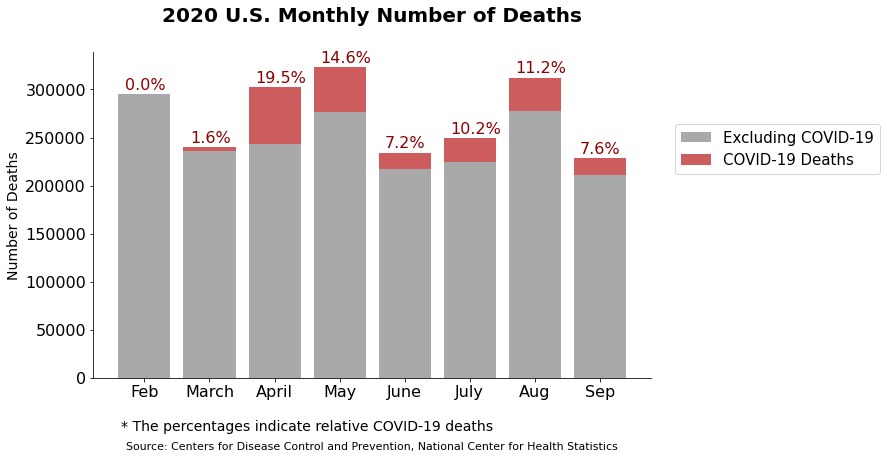

In [60]:
label = ['Feb','March','April','May','June','July','Aug','Sep']
y_value1 = no_covid
y_value2 = covid

fig, axs = plt.subplots(figsize=(10,6)) # Change the figure size here    

p1 = axs.bar(label, y_value1, color='darkgray')   
p2 = axs.bar(label, y_value2, bottom=y_value1, color='indianred')

axs.set_title("2020 U.S. Monthly Number of Deaths", fontsize=20, fontweight="bold", pad=30)   
axs.set_ylabel("Number of Deaths", fontsize=14)
axs.tick_params(labelsize=16)  
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.legend((p1[0],p2[0]),('Excluding COVID-19','COVID-19 Deaths'),bbox_to_anchor=(1.03,0.8),fontsize=15)
txt="* The percentages indicate relative COVID-19 deaths"
txt1 = 'Source: Centers for Disease Control and Prevention, National Center for Health Statistics'
plt.text(2.5, -55000, txt, ha='center', fontsize=14)
plt.text(3.5, -75000, txt1, ha='center', fontsize=11)

for i in range(len(percent)):
    plt.text(i-0.3, deaths[i] + 5000, percent[i], color='darkred', size=16)

plt.show() 